## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io
import itertools as it
import scipy.special as psi
plt.style.use('classic')
import seaborn as sns
import pandas as pd
import math as mt
import time

from scipy.io import loadmat
from scipy import stats
from numpy.random import seed
from numpy.random import rand
from scipy.integrate import quad
from scipy.io import savemat
from tempfile import TemporaryFile
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.decomposition import KernelPCA
from mpl_toolkits import mplot3d
# from mPE_fn import mPE
from scipy.spatial import distance
from scipy.stats import entropy


## Load and Clean Data - STANDARD

In [7]:
# loading entire high-dimensional trajectory
path = '/rds/general/user/lr4617/home/4th_Year_Project/CAPTURE_rat_multidimensional/raw_data/normal/traj_1/trajectories_na/'
trajectories = os.listdir(path)

# removing invalid values (e.g. NaN)
# input data is already normalized (z-score) but needs to get rid of non-valued datapoints
nan_cols = []
for i, time_bin in enumerate(trajectories):
    if time_bin != 'behavs':
        trajectory = loadmat(path + time_bin)
        trajectory = trajectory['trajectory'] 
        for i in range(trajectory.shape[1]):
            if np.isnan(trajectory[:, i]).all():
                nan_cols.append(i)
nan_cols = np.asarray(nan_cols)

if len(nan_cols)>0:
    if len(np.where(nan_cols==nan_cols[0])[0])*3 == len(nan_cols):
        all_trajectories = np.zeros((trajectory.shape[0]*int(len(trajectories)), trajectory.shape[1]-3))
        for i, time_bin in enumerate(trajectories):
            if time_bin != 'behavs':
                trajectory = loadmat(path + time_bin)
                trajectory = trajectory['trajectory'] 
                trajectory = np.delete(trajectory, nan_cols, 1)
                idx_2 = i*trajectory.shape[0]
                all_trajectories[idx_2:idx_2+trajectory.shape[0], 0:trajectory.shape[1]] = trajectory
else:
    all_trajectories = np.zeros((trajectory.shape[0]*int(len(trajectories)), trajectory.shape[1]))
    for i, time_bin in enumerate(trajectories):
        if time_bin != 'behavs':
            trajectory = loadmat(path + time_bin)
            trajectory = trajectory['trajectory'] 
            idx_2 = i*trajectory.shape[0]
            all_trajectories[idx_2:idx_2+trajectory.shape[0], 0:trajectory.shape[1]] = trajectory
            
all_trajectories = np.nan_to_num(all_trajectories)

## Visualization - Standard

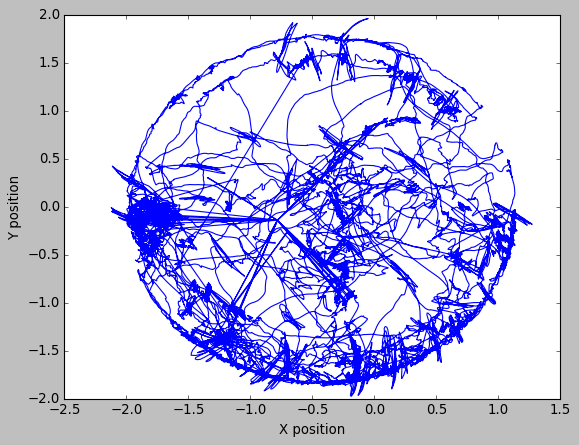

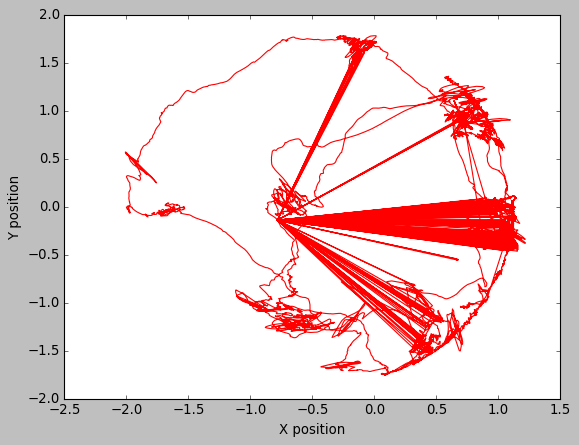

In [8]:
# duration in minutes (f_s * 60 sec * 5 min)
n_min = 30
duration = 300*60*n_min

# visualization - FIRST "n_min" mins
plt.figure()
plt.plot(all_trajectories[duration:duration+duration, 0], all_trajectories[duration:duration+duration, 1])
plt.xlabel("X position")
plt.ylabel("Y position")
plt.show()

# visualization - LAST "n_min" mins
plt.figure()
plt.plot(all_trajectories[all_trajectories.shape[0]-duration-duration:all_trajectories.shape[0]-1-duration, 0], all_trajectories[all_trajectories.shape[0]-duration-duration:all_trajectories.shape[0]-1-duration, 1], 'r')
plt.xlabel("X position")
plt.ylabel("Y position")
plt.show()

## Application - PCA

In [9]:
pca = PCA(n_components=3)
reduced_traj = pca.fit_transform(all_trajectories)

## Visualization - PCA

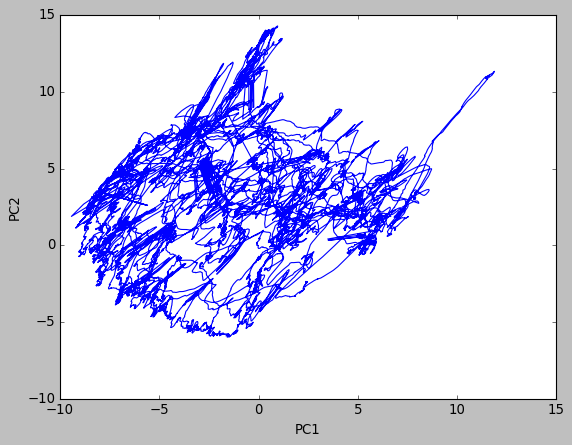

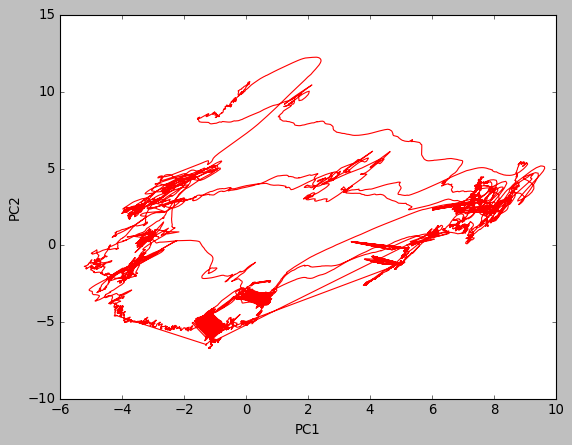

In [10]:
n_min = 30
duration = 300*60*n_min

# visualization - FIRST "n_min" mins
plt.figure()
plt.plot(reduced_traj[duration:duration+duration, 0], reduced_traj[duration:duration+duration, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# visualization - LAST "n_min" mins
plt.figure()
plt.plot(reduced_traj[reduced_traj.shape[0]-duration-duration:reduced_traj.shape[0]-1-duration, 0], reduced_traj[reduced_traj.shape[0]-duration-duration:reduced_traj.shape[0]-1-duration, 1], 'r')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## Visualization - Eigenvectors

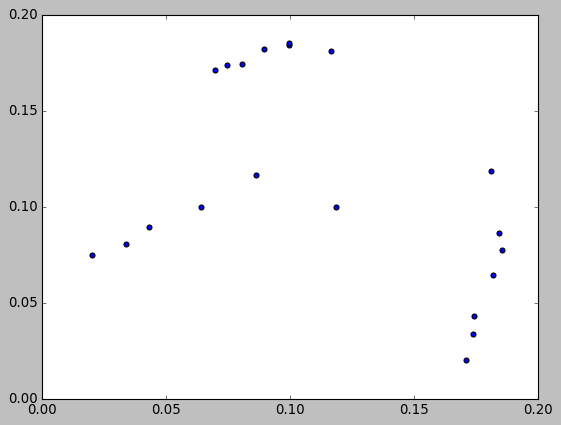

In [26]:
plt.figure()
dims = np.arange(0,60,3)
PM_1 = np.zeros((len(dims),2))
for i, dim in enumerate(dims):
    PM_1[i, :] = pca.components_[0][i:i+2]
plt.scatter(PM_1[:, 0], PM_1[:, 1])

## Load and Clean Data - DRUG

In [3]:
# loading entire high-dimensional trajectory
path = '/rds/general/user/lr4617/home/4th_Year_Project/CAPTURE_rat_multidimensional/raw_data/drug/traj_1/trajectories_na/'
trajectories = os.listdir(path)

# removing invalid values (e.g. NaN)
# input data is already normalized (z-score) but needs to get rid of non-valued datapoints
nan_cols = []
for i, time_bin in enumerate(trajectories):
    if time_bin != 'behavs':
        trajectory = loadmat(path + time_bin)
        trajectory = trajectory['trajectory'] 
        for i in range(trajectory.shape[1]):
            if np.isnan(trajectory[:, i]).all():
                nan_cols.append(i)
nan_cols = np.asarray(nan_cols)

if len(nan_cols)>0:
    if len(np.where(nan_cols==nan_cols[0])[0])*3 == len(nan_cols):
        all_trajectories = np.zeros((trajectory.shape[0]*int(len(trajectories)), trajectory.shape[1]-3))
        for i, time_bin in enumerate(trajectories):
            if time_bin != 'behavs':
                trajectory = loadmat(path + time_bin)
                trajectory = trajectory['trajectory'] 
                trajectory = np.delete(trajectory, nan_cols, 1)
                idx_2 = i*trajectory.shape[0]
                all_trajectories[idx_2:idx_2+trajectory.shape[0], 0:trajectory.shape[1]] = trajectory
else:
    all_trajectories = np.zeros((trajectory.shape[0]*int(len(trajectories)), trajectory.shape[1]))
    for i, time_bin in enumerate(trajectories):
        if time_bin != 'behavs':
            trajectory = loadmat(path + time_bin)
            trajectory = trajectory['trajectory'] 
            idx_2 = i*trajectory.shape[0]
            all_trajectories[idx_2:idx_2+trajectory.shape[0], 0:trajectory.shape[1]] = trajectory
            
all_trajectories = np.nan_to_num(all_trajectories)

## Visualization - Standard

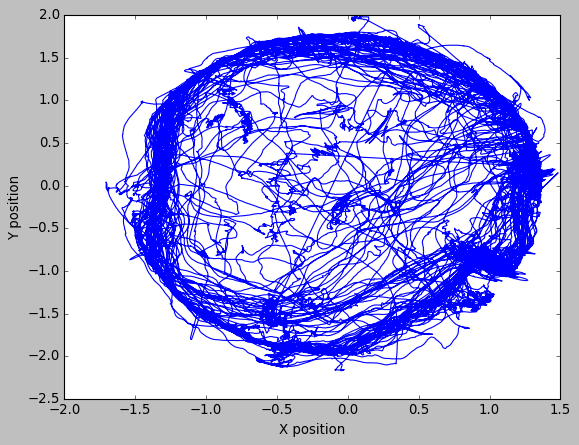

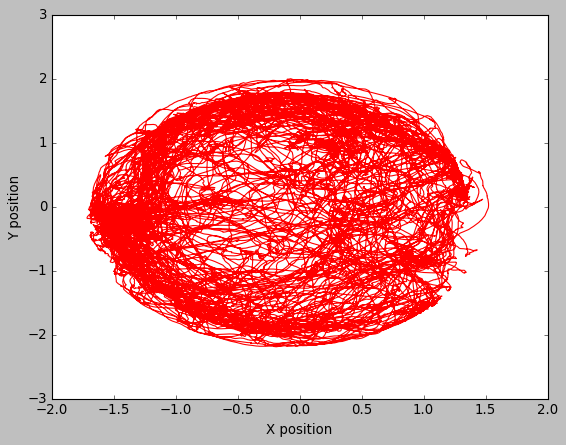

In [4]:
# duration in minutes (f_s * 60 sec * 5 min)
n_min = 30
duration = 300*60*n_min

# visualization - FIRST "n_min" mins
plt.figure()
plt.plot(all_trajectories[duration:duration+duration, 0], all_trajectories[duration:duration+duration, 1])
plt.xlabel("X position")
plt.ylabel("Y position")
plt.show()

# visualization - LAST "n_min" mins
plt.figure()
plt.plot(all_trajectories[all_trajectories.shape[0]-duration-duration:all_trajectories.shape[0]-1-duration, 0], all_trajectories[all_trajectories.shape[0]-duration-duration:all_trajectories.shape[0]-1-duration, 1], 'r')
plt.xlabel("X position")
plt.ylabel("Y position")
plt.show()

## Visualization - PCA

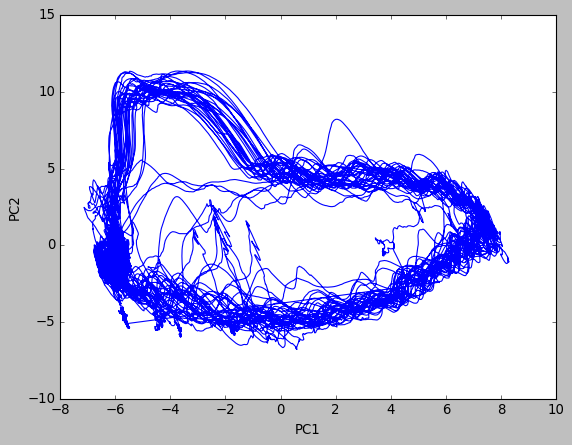

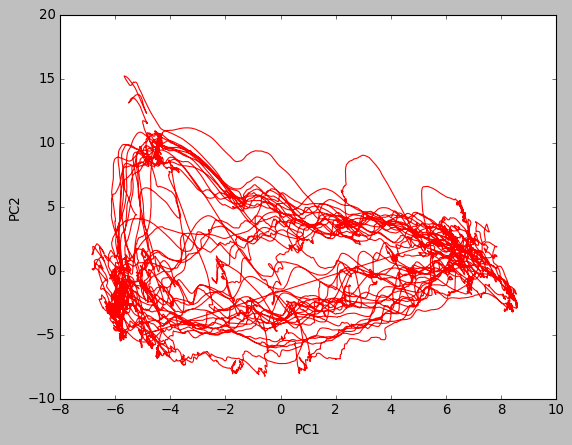

In [5]:
pca = PCA(n_components=3)
reduced_traj = pca.fit_transform(all_trajectories)

# duration in minutes (f_s * 60 sec * 5 min)
duration = 300*60*10



# visualization - FIRST "n_min" mins
plt.figure()
plt.plot(reduced_traj[duration:duration+duration, 0], reduced_traj[duration:duration+duration, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# visualization - LAST "n_min" mins
plt.figure()
plt.plot(reduced_traj[reduced_traj.shape[0]-duration-duration:reduced_traj.shape[0]-1-duration, 0], reduced_traj[reduced_traj.shape[0]-duration-duration:reduced_traj.shape[0]-1-duration, 1], 'r')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()